In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



### Chargement des données


In [2]:
DATA_DIR = 'data'
TRAIN_DATA_PATH = os.path.join(DATA_DIR, 'train_submission.csv')

In [3]:
# Lecture des données d'entraînement
data = pd.read_csv(TRAIN_DATA_PATH)  

# Aperçu des données
print("Aperçu des données :")
data.head()

Aperçu des données :


,ID,Usage,Text,Label
0,136,Public,Finalment Atena le recibe en l'acropoli d'Ate...,arg
1,62,Public,Jane Laffort fille de Joseph Laffort et d' Ang...,lat
2,74,Public,Сонзэ ялаксонзо - Роджер Джозеф Бошкович - у...,myv
3,40,Public,Mɛniɛ nkùɔ dìì mɔ̀nnì bɛnìtìbɛ̀ kɛ́deè kɛ̀ Nɔ...,tbz
4,30,Public,Ka go dirisa thekniki yeo ya phetogonepiso Le...,tsn


### Dataset Information


In [4]:
print(f"\nDimensions du dataset : {data.shape}")


Dimensions du dataset : (38854, 4)


### Valeurs manquantes


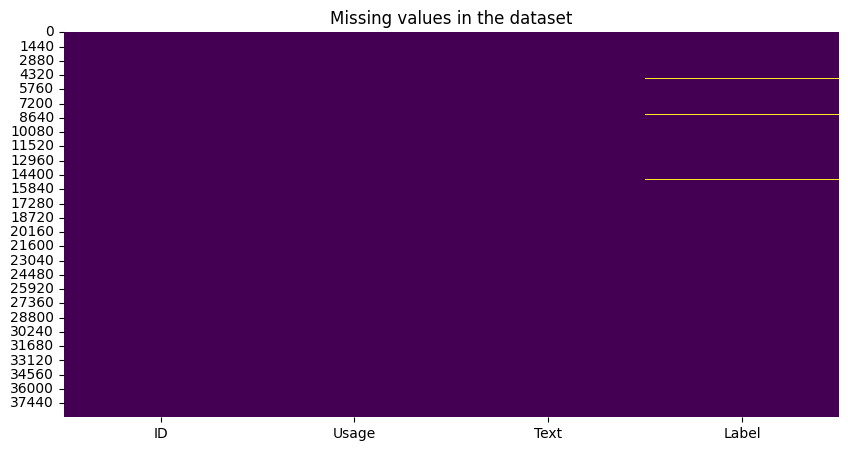

In [5]:
# Vérification des valeurs manquantes plot
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing values in the dataset')
plt.show()


### Distribution des labels



Nombre de classes : 389


C:\Users\noemi\AppData\Local\Temp\ipykernel_23540\1553824441.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


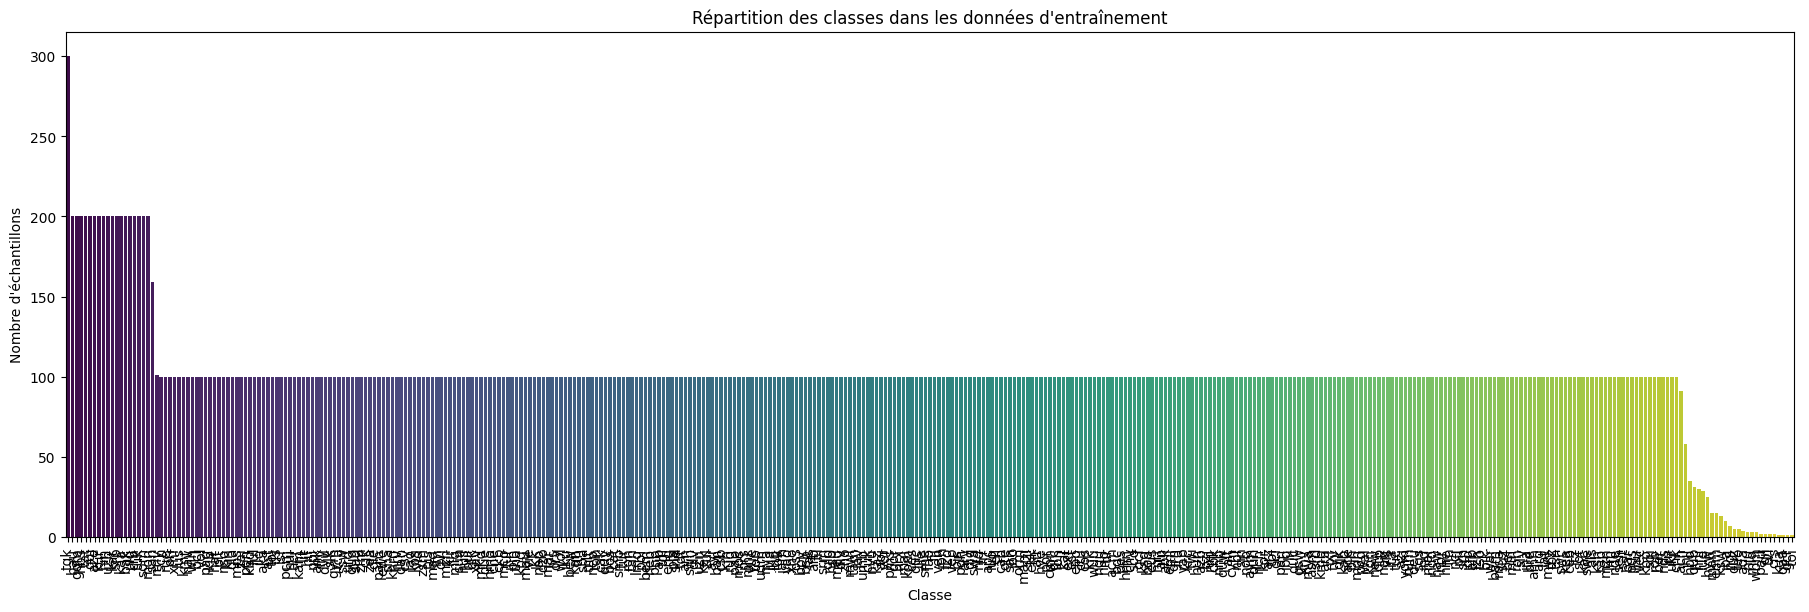

In [6]:
# Distribution des labels
label_counts = data['Label'].value_counts()
# print("\nDistribution des labels :")
# print(label_counts)

# number of unique labels
print(f"\nNombre de classes : {len(label_counts)}")

# Visualisation de la distribution des classes
plt.figure(figsize=(18, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Répartition des classes dans les données d'entraînement")
plt.xlabel("Classe")
plt.ylabel("Nombre d'échantillons")
plt.show()


### Longueur des échantillons



Statistiques sur la longueur des textes :
count    38854.000000
mean       150.556802
std        396.385294
min          5.000000
25%         63.000000
50%        104.000000
75%        172.000000
max      59565.000000
Name: text_length, dtype: float64


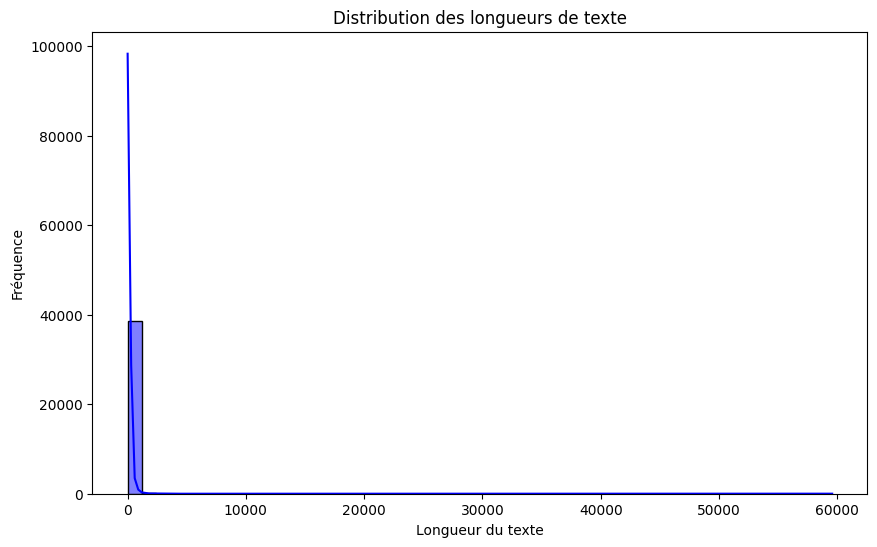

In [7]:
# Longueur des textes
data['text_length'] = data['Text'].apply(len)
print("\nStatistiques sur la longueur des textes :")
print(data['text_length'].describe())

# Visualisation de la distribution des longueurs de texte
plt.figure(figsize=(10, 6))
sns.histplot(data['text_length'], kde=True, bins=50, color='blue')
plt.title("Distribution des longueurs de texte")
plt.xlabel("Longueur du texte")
plt.ylabel("Fréquence")
plt.show()



In [8]:
# index du texte de longueur maximale
max_length_index = data['text_length'].idxmax()
print("\nExemple de texte le plus long :")
print(data.loc[max_length_index, 'Text'])

# nombre d'échantillons: longueur > 1000
num_samples = data[data['text_length'] > 1000].shape[0]
print(f"\nNombre d'échantillons avec une longueur de texte > 1000 : {num_samples}")


Exemple de texte le plus long :
Aaj mai aaplogo ko ek asli ghatna sunane wala hoon. Eh ghatna mere jindagee ki bahut hi sukhad ghatna hai. Pichle saal mai Mahabaleshwar me Hotel Lake View me ruka hua tha. Eh hotel ek  sunsan jagah par bahut alishan tarike se banaya hua hai aur is hotel ke charo taraf kafi jungle bhi hai. Us din sham ko thodi halki bunda bundee hue thee aur isliye mausam suhana tha. Mai hotel ke swimming pool me nahane ke liye gaya hua tha. Maine isliye apne kapare utar karke swimming costum pahan kar ek bada peg Bloody Mary leke swimming pool par pahunch gaya . Maine swimming pool par ja karke pahale apna drink ek table par rakha aur phir swimming pool me dubkee lagaya aur halke halke stroke ke sath tairne  laga.    Thori der tairne ke bad maine ek bahut khoobsurat aurat ko  jiskee umar andajan kareeb 25-26 rahi hogi  swimming pool ke taraf aate dekha. Us aurat ke hath me ek English ki kitab thi. Thodi der tak tairne ke bad mai pool se bahar nikal kar apne table par a

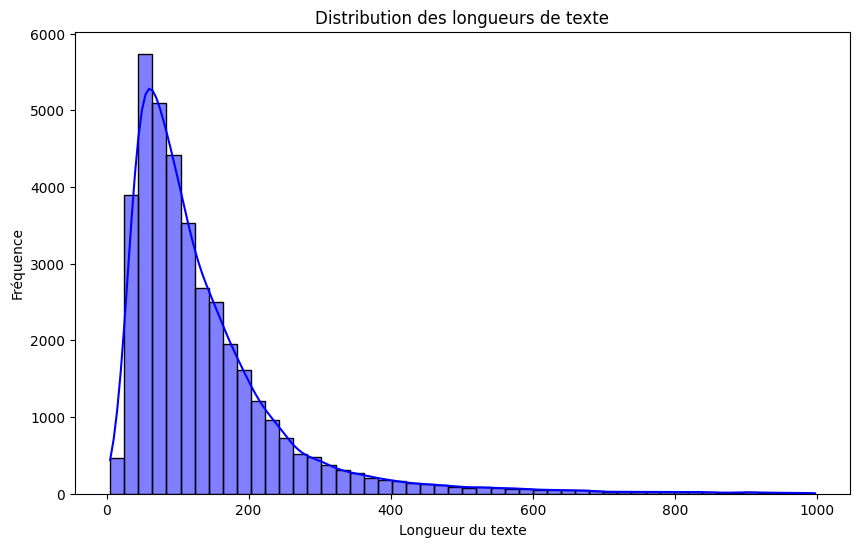

In [9]:
# zoom sur les textes de longueur < 1000
plt.figure(figsize=(10, 6))
sns.histplot(data[data['text_length'] < 1000]['text_length'], kde=True, bins=50, color='blue')
plt.title("Distribution des longueurs de texte")
plt.xlabel("Longueur du texte")
plt.ylabel("Fréquence")
plt.show()
